In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv('../input/sales-forecasting/train.csv')

In [3]:
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


* Taking a quick look at our data

In [4]:
sales.shape

(9800, 18)

* There are 9800 rows and 18 columns 

In [5]:
sales = sales.drop(['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Country', 'Postal Code', 'Product ID'], axis = 1)
sales.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales
0,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


* Droping columns that i'm not using in my analysis

In [6]:
sales.rename(columns = {'Order Date':'order_date', 'Ship Date':'ship_date', 'Ship Mode':'ship_mode', 'Segment':'segment', 'City':'city', 'State':'state', 'Region':'region', 'Category':'category', 'Sub-Category':'sub_category', 'Product Name':'product_name', 'Sales':'sales'}, inplace=True)

* Rename the columns

In [7]:
sales.head()

,order_date,ship_date,ship_mode,segment,city,state,region,category,sub_category,product_name,sales
0,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,12/06/2017,16/06/2017,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
sales.isnull().sum()

order_date      0
ship_date       0
ship_mode       0
segment         0
city            0
state           0
region          0
category        0
sub_category    0
product_name    0
sales           0
dtype: int64

* No null values in the dataset

In [9]:
sales.duplicated().sum()

1

* there is 1 duplicated row

In [10]:
sales.drop_duplicates(inplace=True)

* Droping the duplicated row

In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9799
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_date    9799 non-null   object 
 1   ship_date     9799 non-null   object 
 2   ship_mode     9799 non-null   object 
 3   segment       9799 non-null   object 
 4   city          9799 non-null   object 
 5   state         9799 non-null   object 
 6   region        9799 non-null   object 
 7   category      9799 non-null   object 
 8   sub_category  9799 non-null   object 
 9   product_name  9799 non-null   object 
 10  sales         9799 non-null   float64
dtypes: float64(1), object(10)
memory usage: 918.7+ KB


In [12]:
sales['order_date'] = pd.to_datetime(sales['order_date'])
sales['ship_date'] = pd.to_datetime(sales['ship_date'])

* Changing the dtype of order date and ship date to datetime type

In [13]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9799
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_date    9799 non-null   datetime64[ns]
 1   ship_date     9799 non-null   datetime64[ns]
 2   ship_mode     9799 non-null   object        
 3   segment       9799 non-null   object        
 4   city          9799 non-null   object        
 5   state         9799 non-null   object        
 6   region        9799 non-null   object        
 7   category      9799 non-null   object        
 8   sub_category  9799 non-null   object        
 9   product_name  9799 non-null   object        
 10  sales         9799 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 918.7+ KB


In [14]:
sales['order_year'] = sales['order_date'].dt.year
sales['order_month'] = sales['order_date'].dt.month_name()

* Extracting the month and year to new columns from order date column

# Top 10 cities in sales

In [15]:
#creating a dataframe for top 10 cities in sales
city_sales=pd.DataFrame(sales.groupby(sales['city']).sum()['sales']).reset_index()
city_sales = city_sales.nlargest(10, 'sales')
city_sales.head(10)

,city,sales
327,New York City,252462.5470
265,Los Angeles,173420.1810
450,Seattle,116106.3220
436,San Francisco,109041.1200
372,Philadelphia,108841.7490
207,Houston,63956.1428
80,Chicago,47820.1330
435,San Diego,47521.0290
216,Jacksonville,44713.1830
123,Detroit,42446.9440


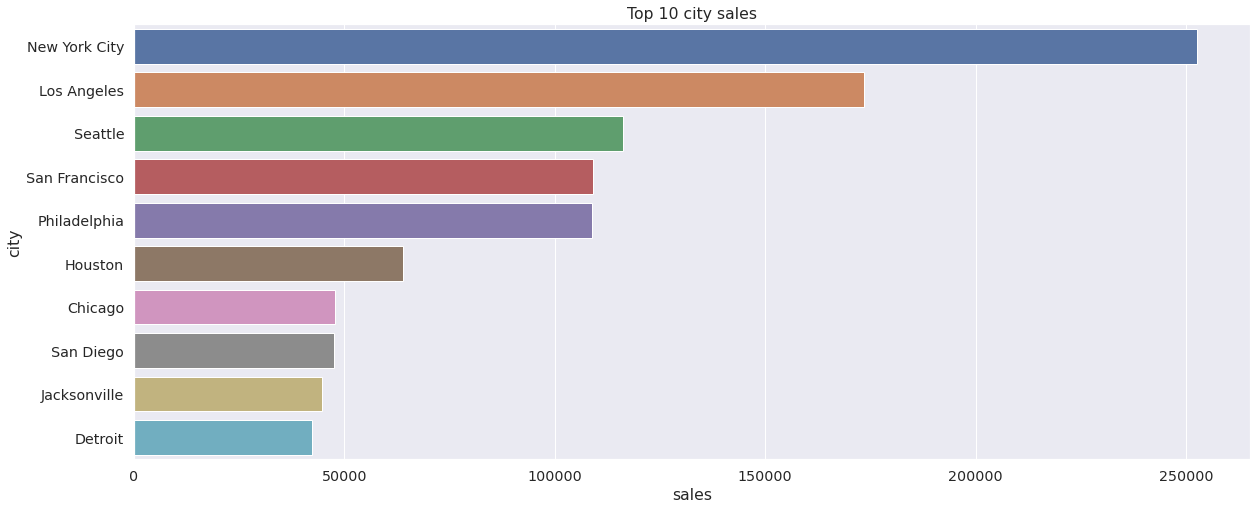

In [16]:
sns.set(font_scale=1.3)
plt.figure(figsize=(20,8));
plt.title('Top 10 city sales')
sns.set_style('darkgrid')
sns.barplot(x='sales', y='city',data = city_sales);

# Which segment generate sales the most ?

In [17]:
segment_sales = pd.DataFrame(sales.groupby(sales['segment']).sum()['sales']).reset_index()
segment_sales = segment_sales.nlargest(3, 'sales')
segment_sales.head()

,segment,sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.247008e+05


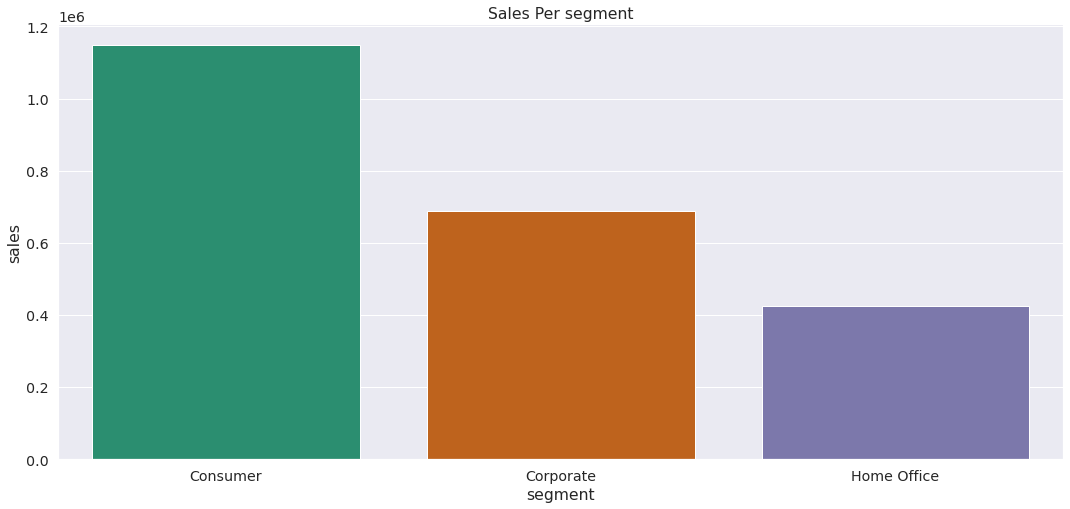

In [18]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
plt.figure(figsize=(18,8));
plt.title('Sales Per segment')
sns.barplot(x='segment', y='sales',data = segment_sales, palette = 'Dark2');

# Which region generate sales the most ?

In [19]:
region_sales = pd.DataFrame(sales.groupby(sales['region'])['sales'].sum()).reset_index()
region_sales = region_sales.nlargest(4, 'sales')
region_sales.head()

,region,sales
3,West,710219.6845
1,East,669237.3540
0,Central,492646.9132
2,South,389151.4590


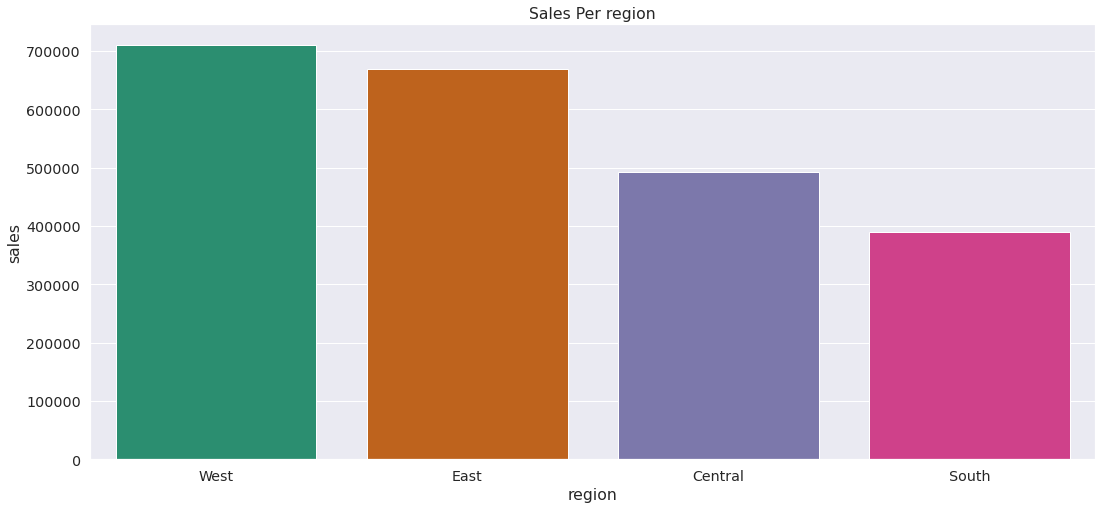

In [20]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
plt.figure(figsize=(18,8));
plt.title('Sales Per region')
sns.barplot(x='region', y='sales',data = region_sales, palette = 'Dark2');

# Which category generate sales the most ? 

In [21]:
sales['category'].value_counts()

Office Supplies    5909
Furniture          2077
Technology         1813
Name: category, dtype: int64

In [22]:
category_sales = pd.DataFrame(sales.groupby(sales['category'])['sales'].sum()).reset_index()
category_sales = category_sales.nlargest(3, 'sales')
category_sales.head()

,category,sales
2,Technology,827455.8730
0,Furniture,728377.2037
1,Office Supplies,705422.3340


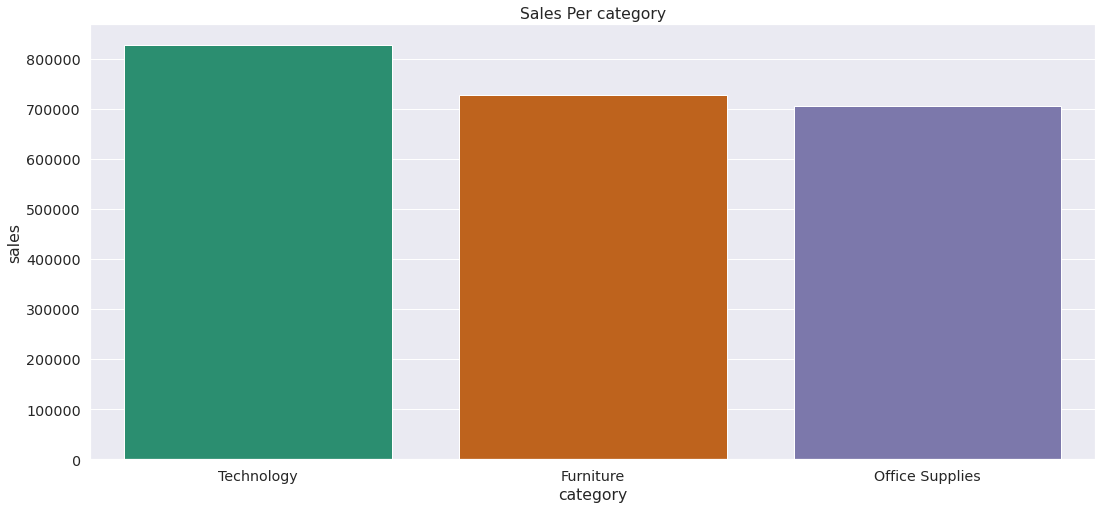

In [23]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
plt.figure(figsize=(18,8));
plt.title('Sales Per category')
sns.barplot(x='category', y='sales',data = category_sales, palette = 'Dark2');

# which sub category generate sales the most ?

In [24]:
sales['sub_category'].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          606
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: sub_category, dtype: int64

In [25]:
sub_category_sales = pd.DataFrame(sales.groupby(sales['sub_category'])['sales'].sum()).reset_index()
sub_category_sales = sub_category_sales.nlargest(10, 'sales')
sub_category_sales.head(10)

,sub_category,sales
13,Phones,327782.4480
5,Chairs,322541.3590
14,Storage,219343.3920
16,Tables,202810.6280
3,Binders,200028.7850
11,Machines,189238.6310
0,Accessories,164186.7000
6,Copiers,146248.0940
4,Bookcases,113813.1987
1,Appliances,104618.4030


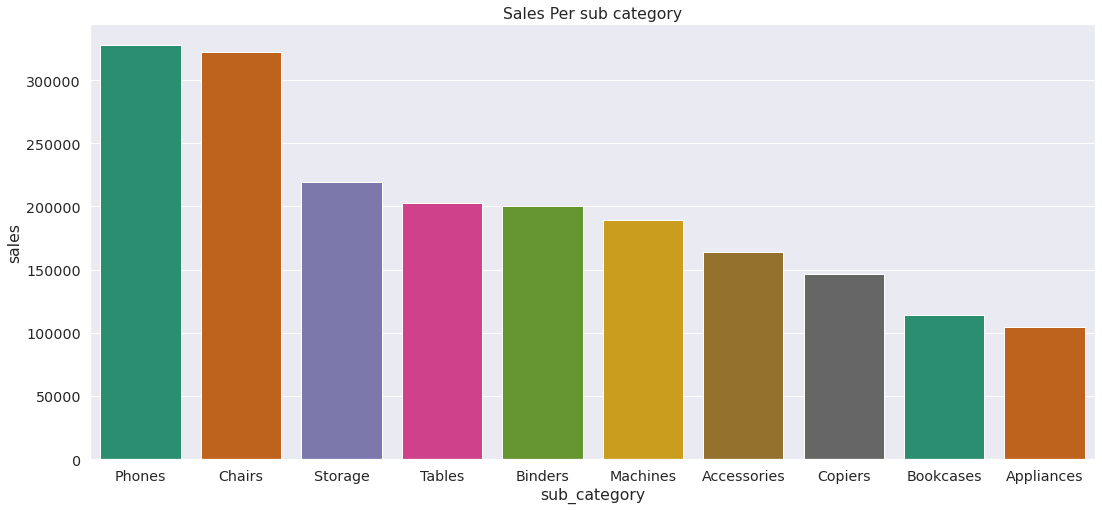

In [26]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
plt.figure(figsize=(18,8));
plt.title('Sales Per sub category')
sns.barplot(x='sub_category', y='sales',data = sub_category_sales, palette = 'Dark2');

# Which state generate sales the most ?

In [27]:
state_sales = pd.DataFrame(sales.groupby(sales['state']).sum()['sales'].reset_index())
state_sales = state_sales.nlargest(10, 'sales')
state_sales.head(10)

,state,sales
3,California,446306.4635
30,New York,306361.1470
41,Texas,168572.5322
45,Washington,135206.8500
36,Pennsylvania,116276.6500
8,Florida,88436.5320
11,Illinois,79236.5170
20,Michigan,76136.0740
33,Ohio,74848.9780
44,Virginia,70636.7200


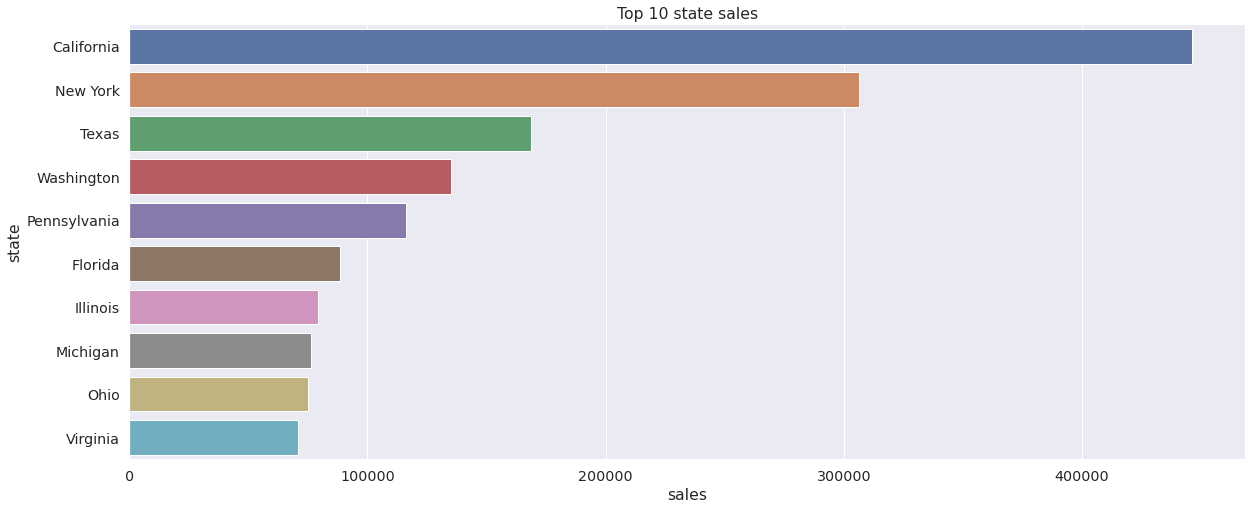

In [28]:
sns.set(font_scale=1.3)
plt.figure(figsize=(20,8));
plt.title('Top 10 state sales')
sns.set_style('darkgrid')
sns.barplot(x='sales', y='state',data = state_sales);

# What is the top selling products ?

In [29]:
product_sales = pd.DataFrame(sales.groupby(sales['product_name']).sum()['sales'].reset_index())
product_sales = product_sales.nlargest(10,'sales')
product_sales.head(10)

,product_name,sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479
687,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
804,Hewlett Packard LaserJet 3310 Copier,18839.686
786,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
682,GBC DocuBind P400 Electric Binding System,17965.068
812,High Speed Automatic Electric Letter Opener,17030.312


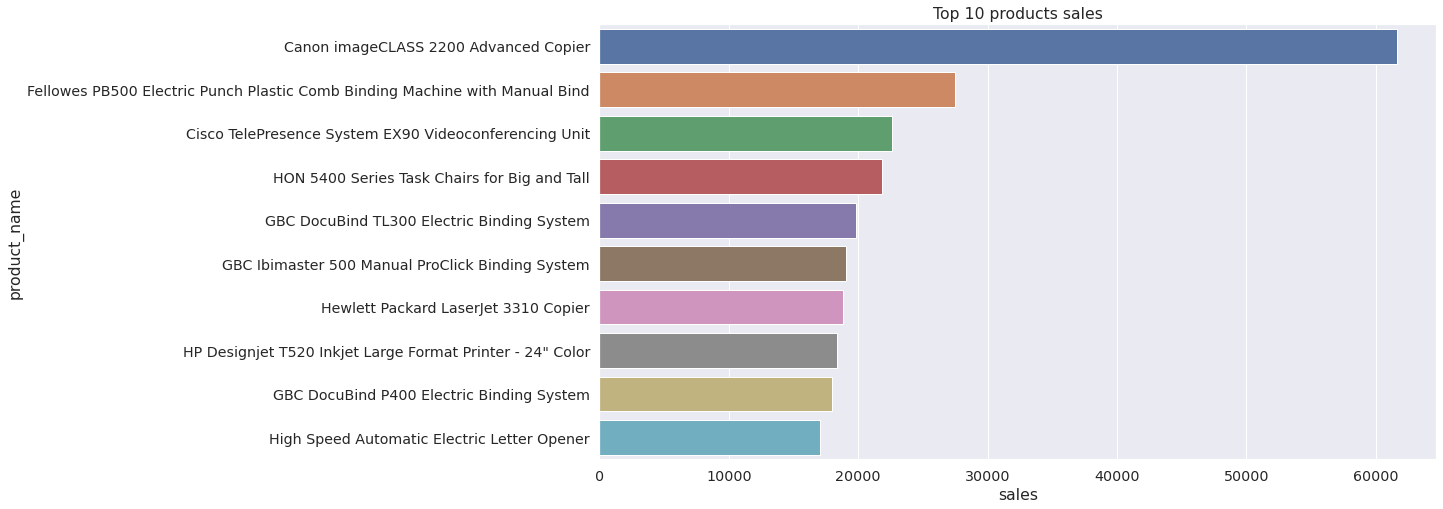

In [30]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,8));
plt.title('Top 10 products sales')
sns.set_style('darkgrid')
sns.barplot(x='sales', y='product_name',data = product_sales);

# Which ship mode generate sales the most ?

In [31]:
shipmode_sales = pd.DataFrame(sales.groupby(sales['ship_mode']).sum()['sales'].reset_index())
shipmode_sales = shipmode_sales.nlargest(4,'sales')
shipmode_sales.head(4)

,ship_mode,sales
3,Standard Class,1.340550e+06
2,Second Class,4.499142e+05
0,First Class,3.455723e+05
1,Same Day,1.252190e+05


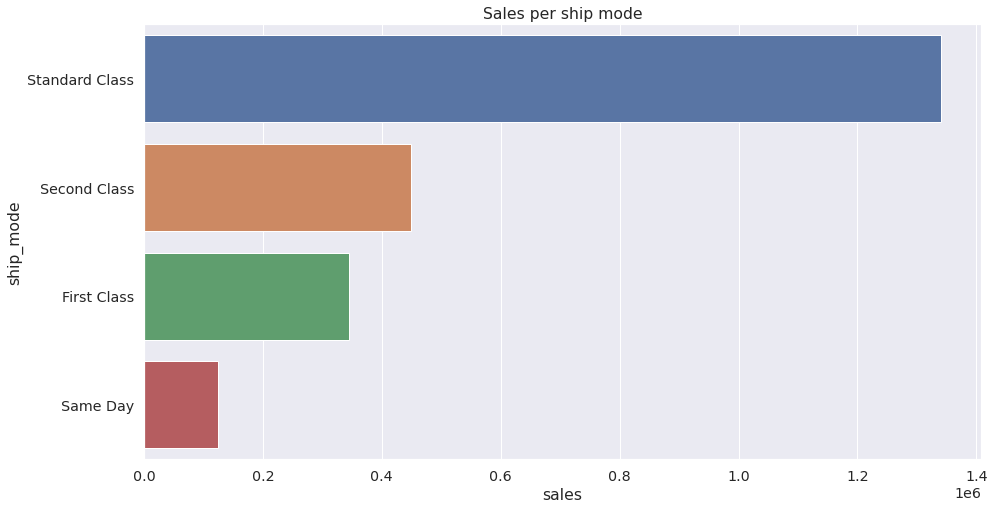

In [32]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,8));
plt.title('Sales per ship mode')
sns.set_style('darkgrid')
sns.barplot(x='sales', y='ship_mode',data = shipmode_sales);

# Sales over the 4 years

In [33]:
year_sales = pd.DataFrame(sales.groupby(sales['order_year']).sum()['sales'].reset_index())
year_sales = year_sales.nlargest(4,'sales')
year_sales.head(4)

,order_year,sales
3,2018,722052.0192
2,2017,600192.5500
0,2015,479574.8361
1,2016,459436.0054


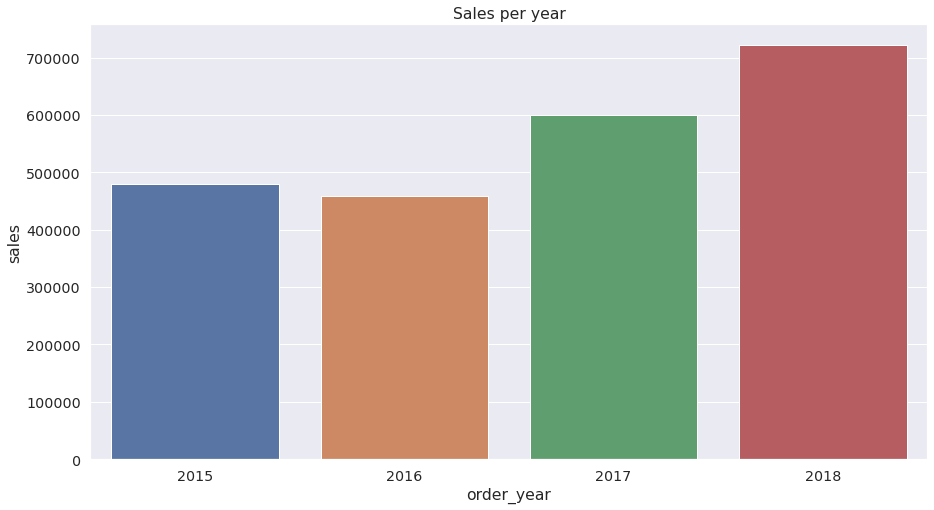

In [34]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,8));
plt.title('Sales per year')
sns.set_style('darkgrid')
sns.barplot(x='order_year', y='sales',data = year_sales);


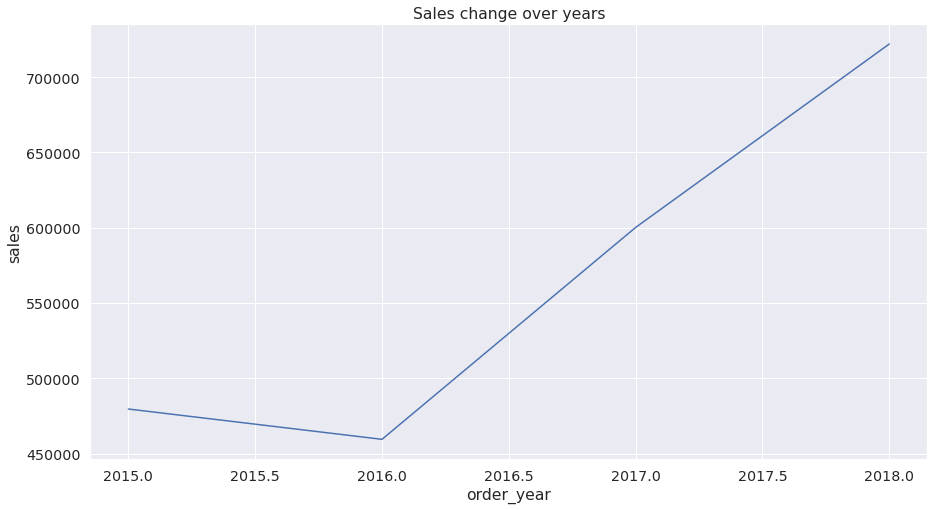

In [35]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15,8));
plt.title('Sales change over years')
sns.set_style('darkgrid')
sns.lineplot(x='order_year', y='sales',data = year_sales);

# Top selling months over the 4 years

In [36]:
month_sales = pd.DataFrame(sales.groupby(sales['order_month']).sum()['sales'].reset_index())
month_sales = month_sales.nlargest(12,'sales')
month_sales.head(12)

,order_month,sales
9,November,268768.7885
2,December,246266.5152
11,September,245155.0671
7,March,212256.1344
1,August,207601.7939
10,October,183851.9562
8,May,166000.7467
5,July,159472.5865
4,January,155990.9154
0,April,142702.8761


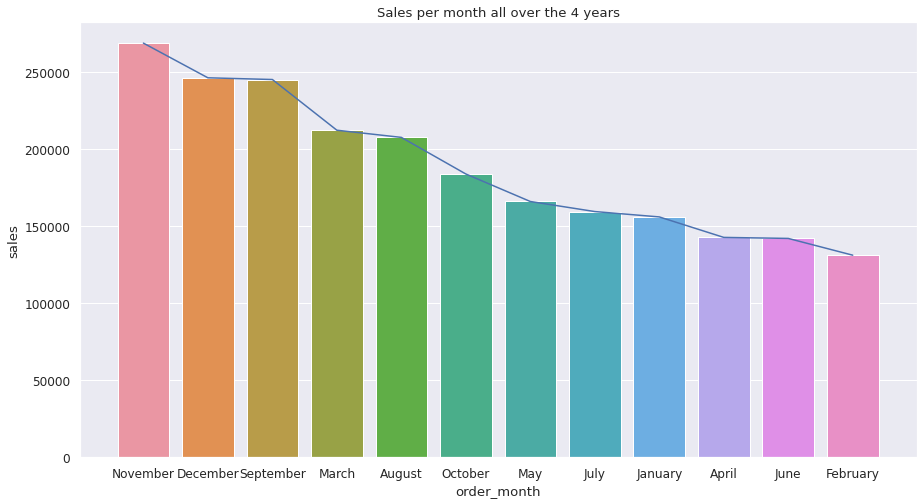

In [37]:
sns.set(font_scale=1.1)
plt.figure(figsize=(15,8));
plt.title('Sales per month all over the 4 years')
sns.set_style('darkgrid')
sns.barplot(x='order_month', y='sales',data = month_sales);
sns.lineplot(x='order_month', y='sales',data = month_sales);

In [38]:
sales.head()

,order_date,ship_date,ship_mode,segment,city,state,region,category,sub_category,product_name,sales,order_year,order_month
0,2017-08-11,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,August
1,2017-08-11,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,August
2,2017-12-06,2017-06-16,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,December
3,2016-11-10,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,November
4,2016-11-10,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,November


In [39]:
year_2015 = sales.loc[sales['order_year'] == 2015]
year_2016 = sales.loc[sales['order_year'] == 2016]
year_2017 = sales.loc[sales['order_year'] == 2017]
year_2018 = sales.loc[sales['order_year'] == 2018]

* Creating a dataframe for each of the 4 years

# Change in monthly sales for 2015

In [40]:
monthly_sales_2015 = pd.DataFrame(sales.groupby(year_2015['order_month']).sum()['sales'].reset_index())
monthly_sales_2015 = monthly_sales_2015.nlargest(12,'sales')
monthly_sales_2015.head(12)

,order_month,sales
11,September,65956.3998
9,November,64369.4565
2,December,63568.3107
7,March,54027.6920
1,August,37349.2655
5,July,35194.5580
10,October,34561.9470
8,May,29520.4900
6,June,29181.3346
4,January,28828.2540


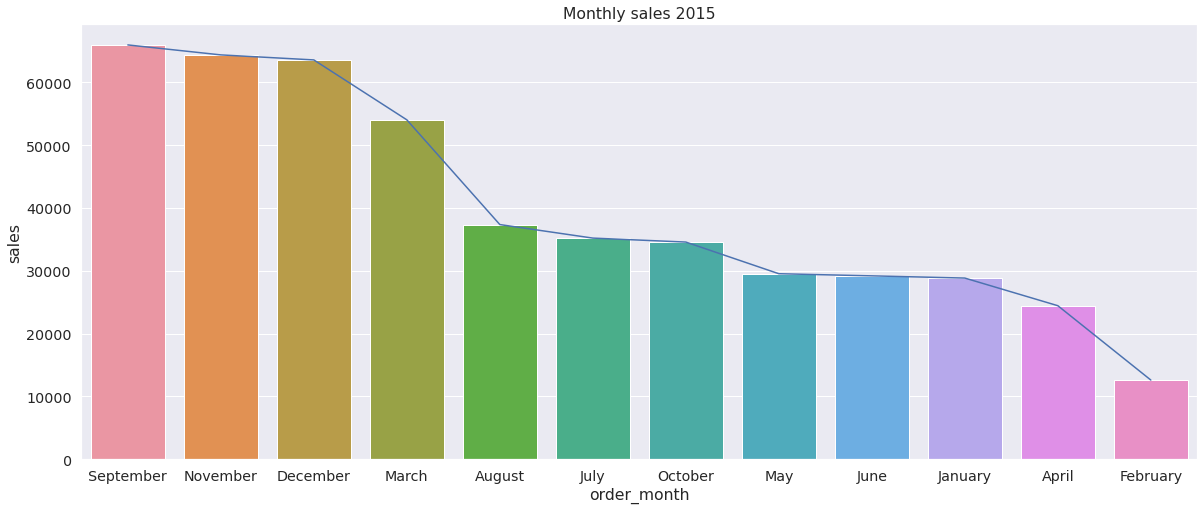

In [41]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
plt.figure(figsize=(20,8))
plt.title('Monthly sales 2015')
sns.lineplot(x= 'order_month', y='sales', data = monthly_sales_2015);
sns.barplot(x='order_month', y='sales',data = monthly_sales_2015);

# Change in monthly sales for 2016

In [42]:
monthly_sales_2016 = pd.DataFrame(sales.groupby(year_2016['order_month']).sum()['sales'].reset_index())
monthly_sales_2016 = monthly_sales_2016.nlargest(12,'sales')
monthly_sales_2016.head(12)

,order_month,sales
11,September,65352.9970
2,December,52891.8832
9,November,50009.1450
1,August,49076.9300
0,April,38056.9685
7,March,34489.6776
10,October,31631.8890
8,May,30761.5585
4,January,29347.3864
5,July,28573.3100


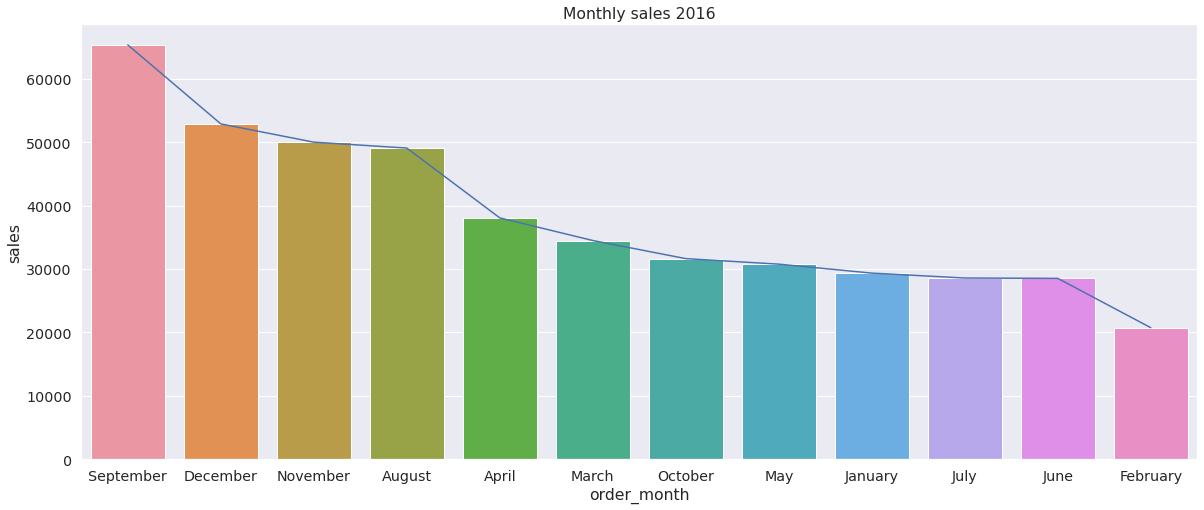

In [43]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
plt.figure(figsize=(20,8))
plt.title('Monthly sales 2016')
sns.lineplot(x= 'order_month', y='sales', data = monthly_sales_2016);
sns.barplot(x='order_month', y='sales',data = monthly_sales_2016);

# Change in monthly sales for 2017

In [44]:
monthly_sales_2017 = pd.DataFrame(sales.groupby(year_2017['order_month']).sum()['sales'].reset_index())
monthly_sales_2017 = monthly_sales_2017.nlargest(12,'sales')
monthly_sales_2017.head(12)

,order_month,sales
2,December,72847.0855
9,November,66392.5470
8,May,64836.2518
10,October,52156.9580
7,March,48990.1410
3,February,48907.5900
1,August,45766.8144
0,April,42368.0480
5,July,41761.9430
11,September,40692.3063


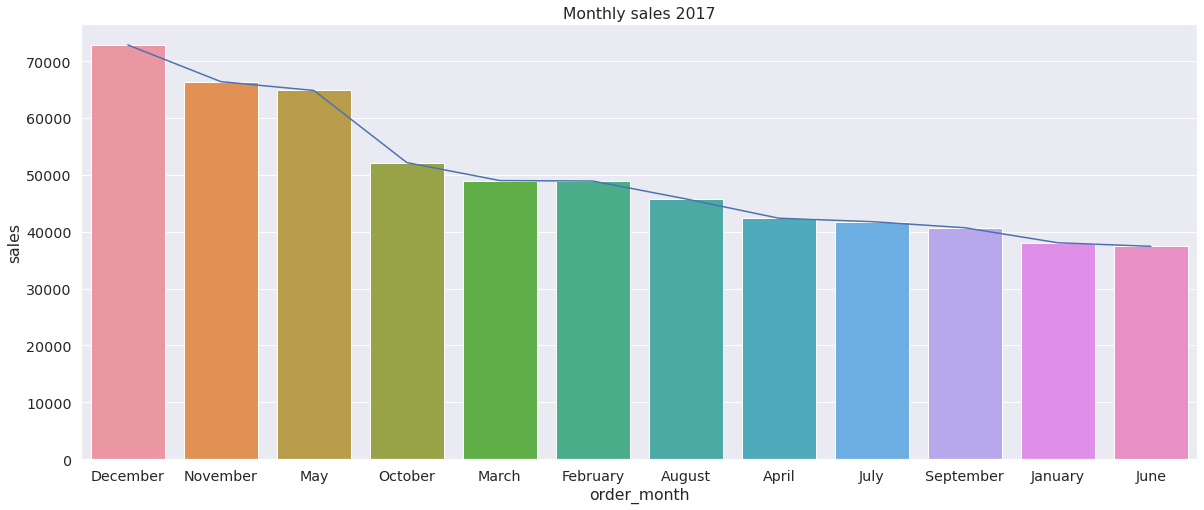

In [45]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
plt.figure(figsize=(20,8))
plt.title('Monthly sales 2017')
sns.lineplot(x= 'order_month', y='sales', data = monthly_sales_2017);
sns.barplot(x='order_month', y='sales',data = monthly_sales_2017);

# Change in monthly sales for 2018

In [46]:
monthly_sales_2018 = pd.DataFrame(sales.groupby(year_2018['order_month']).sum()['sales'].reset_index())
monthly_sales_2018 = monthly_sales_2018.nlargest(12,'sales')
monthly_sales_2018.head(12)

,order_month,sales
9,November,87997.6400
1,August,75408.7840
7,March,74748.6238
11,September,73153.3640
10,October,65501.1622
4,January,59767.0910
2,December,56959.2358
5,July,53942.7755
3,February,48928.8334
6,June,46912.8475


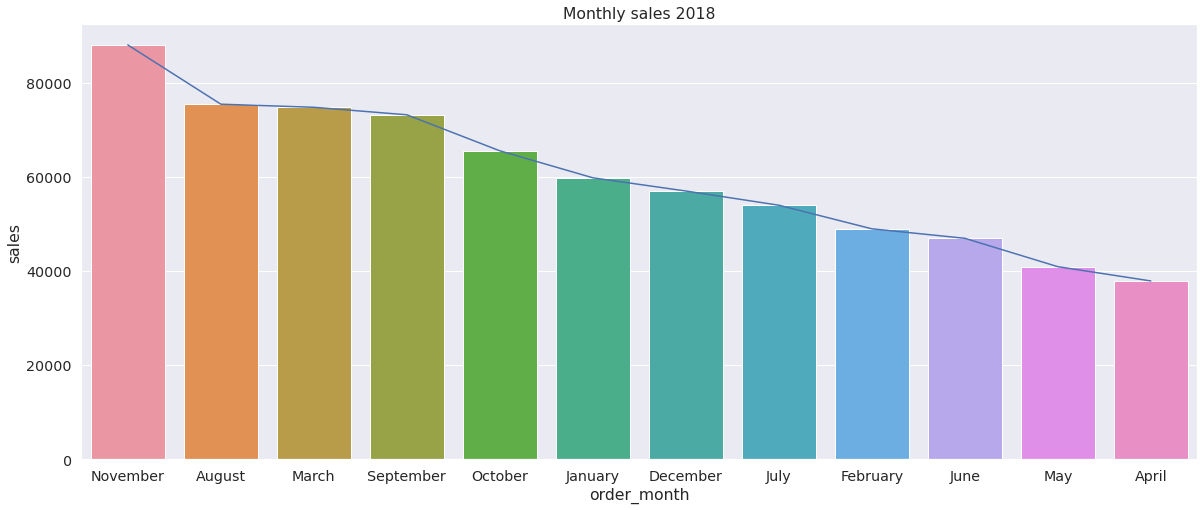

In [47]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
plt.figure(figsize=(20,8))
plt.title('Monthly sales 2018')
sns.lineplot(x= 'order_month', y='sales', data = monthly_sales_2018);
sns.barplot(x='order_month', y='sales',data = monthly_sales_2018);